<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation
***

**Name**: Bryn Sorli

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 27**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

ImportError: Missing required dependencies ['numpy']

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 30 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 17 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 3 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

**Solution**<br>
$P(8) = \frac{17}{50}$<br>
$P(20) = \frac{3}{50}$<br>
$P(7|8) = \frac{1}{8}$<br>
$P(7|20) = \frac{1}{20}$<br>
$R_7 = \frac{17}{50}*\frac{1}{8} + \frac{3}{50}*\frac{1}{20} = .0455$<br>

**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

**Solution**<br>
$P(E) = \frac{17}{50}$<br>
$P(T) = \frac{3}{50}$<br>
$P(R_7|E) = \frac{1}{8}$<br>
$P(R_7|T) = \frac{1}{20}$<br>
$P(E|R_7) = \frac{P(R_7|E)*P(E)}{P(R_7)} => \frac{\frac{1}{8}*\frac{17}{50}}{.0455} = .9341$

**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

**Solution**
They are not independent since P(${R_7}$|E) does not equal P($R_7$). This is shown in the math above where P($R_7$|E) = $\frac{1}{8}$ but P($R_7$) = .0455. 


**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

$P(S \mid L_1)$ = $\frac{P(L_1 \mid S)*P(S)}{P(L_1}$<br>
$P(L_1 \mid S) = 1$<br>
$P(S) = \frac{30}{50}$<br>
$P(L_1) = 1*\frac{30}{50} + \frac{6}{8}*\frac{17}{50} + \frac{6}{20}*\frac{3}{50} = .873$<br>
$\frac{\frac{30}{50}}{.873} = .68275$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

$P(S \mid L_n)$ = $\frac{P(L_n \mid S)*P(S)}{P(L_n}$<br>
$P(L_n \mid S) = 1$<br>
$P(S) = \frac{30}{50}$<br>
$P(L_n) = (1)^n*\frac{30}{50} + (\frac{6}{8})^n*\frac{17}{50} + (\frac{6}{20})^n*\frac{3}{50}$<br>

In [46]:
def prob_six(n): #Your code goes here.
    return(0.6/((.6)+((.75**n)*(.34))+(((.3)**n)*.06)))
               
print("Part D: ", prob_six(1))
#print(prob_six(80))

('Part D: ', 0.6872852233676976)


**Code**
- This code uses bayes theorem as well as the law of total probability to calculate the mean for Ln

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [47]:
for i in range(100):
    x = prob_six(i)
    if(x >= .95):
        print("Smallest value: " , i)
        break

('Smallest value: ', 9)


**Code**
This code will loop through values until it determines a probability that is greater than .95 and then returns that value. 

***
<a id='p2'></a>
[Back to top](#top)


### [20 points] Problem 2

Oscar and Stella are two octopuses who are very excited to have both secured professorships in the Computer Science department at CU. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking. Eg. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, he wants to go to the brewing market to grab a coffee. That being said, Osacar has made a break through in his research and wants to follow up on it at the library, but he needs to run some errands too. Assume Oscar can do his errands at any location on the map. 

Compute by hand the probability that Oscar goes to the Brewing Market ($C$) in his first stop, makes a second stop at any location, then goes to the Library ($L$) third. 

P(C->Any->L) = P(C) * (P(H->L)+P(E->L)<br>
$P(C) = \frac{1}{4}$<br>
$P(H->L) = \frac{1}{3}*\frac{1}{3}$<br>
$P(E->L) = \frac{1}{3}*\frac{1}{4}$<br>
$P(C->Any->L) = \frac{1}{4}* (\frac{1}{9} + \frac{1}{12}) = .04861$

**Part B**: Stella is a competitive body-building octopus professor. This is quite the feat given her lack of bones!  Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Engineering Center ($E$). (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

**Solution**<br>
P(E->G) = P(first)(p(f)) or P(second)(p(s))<br>
$P(f) = \frac{1}{4}$<br>
$P(s) = P(L->G) or P(R->G)$<br>
$P(S) = \frac{1}{4}*\frac{1}{4} + \frac{1}{4}*\frac{1}{2}$<br>
$P(E->G) = (\frac{1}{4} + \frac{3}{16}) = .4375$

**Part C**: Suppose that Stella works late at the Engineering Center, while Oscar goes to the Gym.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**Solution**<br>
Part 1.<br>
$$
P(meeting in one move) = P(L) + P(R)
$$
$$
P(L) = \frac{1}{4}*\frac{1}{4} = \frac{1}{16}
$$
$$
P(R) = \frac{1}{4}*\frac{1}{4} = \frac{1}{16}
$$
$$
=> \frac{1}{16}*\frac{1}{16} = \frac{1}{8} = .125
$$
Part 2.<br>
$$P(2 moves to hill) = P(S@H) + P(O@H)
$$
$$
P(S@H) = \frac{1}{4}*\frac{1}{3} + \frac{1}{4}*\frac{1}{4} + \frac{1}{4}*\frac{1}{4} = \frac{5}{24}
$$
$$
P(O@H) = \frac{1}{4}*\frac{1}{4} = \frac{1}{16}
$$
$$
=> \frac{5}{384} = .01302
$$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [48]:
E = ['C','L','G','R']
R = ['G', 'E']
G = ['H','L','E','R']
H = ['C','L','G']
C = ['H','L','E']
L = ['G','H','C','E']
count = 0
tcount = 10000
for i in range(10000):
    f = np.random.choice(E)
    if f == 'C':
        s = np.random.choice(C)
        if s == 'H':
            t = np.random.choice(H)
        elif s == 'E':
            t = np.random.choice(E)
        else:
            continue
        #print(s)
        #t = np.random.choice(s)
        if t == 'L':
            count += 1
print(count/tcount)

0.0454


This code will run through 10000 cases and find the cases where Oscar went to the coffee and ended up in the library. The value is very similar to the calculated value above and is therefore a reasonable approximation. 

In [49]:
count = 0
for i in range(10000):
    first = np.random.choice(E)
    if first == 'G':
        count += 1
        #print('H')
    else:
        if first == 'R':
            sec = np.random.choice(R)
            if sec == 'G':
                count += 1
                #print('H')
        elif first == 'L':
            sec = np.random.choice(L)
            if sec == 'G':
                count += 1
                #print('H')
        else:
            continue
print(count)
print(count/tcount)

4278
0.4278


Just like the code above this code will run 10000 cases and will first check to see if the gym was the first choice then will check if G was the second choice. This is very similar to the calculated value above. 

In [50]:
print('part 1:')
count1 = count = 0
for i in range(10000):
    S = np.random.choice(E)
    O = np.random.choice(G)
    #print(S, "  ", O)
    if S == O:
        count1 += 1
    if S == 'G':
        #print('part 2: ')
        temp = np.random.choice(G)
    if S == 'R':
        #print('part 3: ')
        temp = np.random.choice(R)
    if S == 'L':
        #print('part 4: ')
        temp = np.random.choice(L)
    if S == 'C':
        #print('part 5: ')
        temp = np.random.choice(C)
    if O == 'H':
        #print('part 6: ')
        temp1 = np.random.choice(H)
    if S == 'R':
        #print('part 7: ')
        temp1 = np.random.choice(R)
    if S == 'L':
        #print('part 8: ')
        temp1 = np.random.choice(L)
    if S == 'E':
        #print('part 9: ')
        temp1 = np.random.choice(E)
    if temp1 == temp:
        count += 1
    
print(count)
print(count1/tcount)
print('part 2: ')
print(count/tcount)


part 1:
2530
0.1253
part 2: 
0.253


This code gives a realistic value for Part 1 using the same random selection processes as well as an iteration through 10000 cases. Part 2 is not as close but follows the same coding pattern as the previous questions. 

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Zach and Rachel are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Zach practicing his sweetest Jedi moves and trying to strike Rachel, then Rachel practicing *her* best moves and trying to strike Zach.
* If Zach manages to strike Rachel, then Zach is awarded a point, and similarly if Rachel manages to strike Zach, then Rachel is awarded a point.
* If a round ends in a tie, then Zach and Rachel proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $Z$ be the event that "Zach wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Zach successfully lands his lightsaber strikes with probability $p$, and Rachel lands her strikes with probability $q$.

**Part A**: The duel will continue until Zach or Rachel wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Zach has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

 $\Omega$ = $[HM, MH, MM, HH]$

**Part B**: Determine $P(Z \mid E)$ in terms of $p$ and $q$.

$$P(Z|E) = \frac{P(E|Z)*P(Z)}{P(E)}$$
$$P(E|Z) = 1$$
$$P(Z) = p(1-q)$$
$$P(E) = p(1-q) + (1-p)q$$
$$P(Z|E) = \frac{1*p(1-q)}{p(1-q) + (1-p)q}$$
$$P(Z|E) = \frac{p(1-q)}{p(1-q) + (1-p)q}$$

**Part C**: Explain why events $C$ and $Z$ are independent. 

**Solution**<br>
Events C and Z are independent if they follow the rule, $P(Z \mid C) = P(Z)$. This equality makes sense because it is not necesarliy true that Zach one given the cometition ended after round 1. There is an equal chance for either to win the duel. 

**Part D**: Use the Law of Total Probability to show that $P(Z) = p(1-q) + (2pq - p - q +1) ~P(Z \mid C)$. 

**Solution**<br>
Using the law of total probability we can see that P(Z) = P(Z|E)P(E) + P(Z|C)P(C)<br>
$$P(Z) = \frac{P(Z\cap E)(P(E))}{P(E)} + [(1-p)(1-q) + pq] P(Z\mid C)$$
$$P(Z) = P(Z\cap E) + [(1-p)(1-q) + pq] P(Z\mid C)$$
$$P(Z\cap E) = p(1-q)$$
$$P(Z) = p(1-q) + [1-p-q + 2pq] P(Z\mid C)$$

**Part E**: Use the fact from **Part B** that $P(Z \mid C) = P(Z)$ to determine $P(Z)$ in terms of $p$ and $q$.

**Solution**
$$P(Z\mid C) = P(Z) $$
$$P(Z) - [2pq-p-q +1] P(Z) = p(1-q)$$
$$P(Z)(1 - 2pq+ p +q -1) = p(1-q)$$
$$P(Z)(2pq+ p +q) = p(1-q)$$
$$P(Z) = \frac{p(1-q)}{(2pq+ p +q)}$$
$$P(Z) = \frac{p(1-q)}{p(1-q) + (1-p)q}$$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

**Solution**
- It could be said that the events E and C are independent of each other therefore they would have no effect on each others outcomes. Yeilding the same result. 

**Part G**: Explain the significance of the solution technique for $P(Z)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(Z)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

**Solution**
- The technique we used was the law of total probability which was crucial as it allowed us to deal with the infinite cases of duels. This is the same reasoning behind why computation was flawed as it can not handle the nearly infinite possibilty of rounds. Our main assumption was that the events have to be independent which they were. This is what would prevent using this law as not all events are independent for other calculations. 

***
<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \\$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 3, 7, 15, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect either \\$50 or \\$250 or pay the bank \\$50.  There is always an equal probability associated with each of these possible cards.


- Squares 0, 10, and 20 do not trigger any action 


- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    

- If the player passes or lands on **GO** she collects \$200. 

- If the player lands on any other square not mentioned above, she pays the bank \$25. 


If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [51]:
def miniopoly_turn(state, cash):
    dice1 = np.random.randint(1,7)
    dice2 = np.random.randint(1,7)
    if state == 30:
        if dice1 == dice2:
            nstate = 10 + (dice1+dice2)
        else:
            cash = cash - 20
            return state, cash
    else:    
        dicet = dice1 + dice2
        nstate = state + dicet
    if nstate > 39:
        nstate = nstate - 40
        cash = cash + 200
    if nstate == 3 or nstate == 7 or nstate == 15 or nstate == 22 or nstate == 33 or nstate == 36:
        cashL = [50, 250, -50]
        casht = np.random.choice(cashL)
        cash = cash + casht
    elif nstate == 0 or nstate == 10 or nstate == 20:
        return nstate, cash
    elif nstate == 30:
        return nstate, cash
    else:
        cash = cash - 25
    
    return nstate, cash



This code implements the desired function with the desired paramters. 

**Part B**: Use your function from **Part A** to Simulate at least 10000 25-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game.

In [52]:
import matplotlib.pylab as plt
p1 = np.empty([1,10])
tgames = 0
count = 0
while tgames < 10000:
    count = count + 1
    p1s = 0
    p1c = 200
    viable = 1
    turn = 0
    while p1c > 0 and turn <= 25:
        p1s, p1c = miniopoly_turn(p1s, p1c)
        if p1c < 0:
            viable = 0
            p1c = 0
            break
        turn += 1
    if viable == 1:
        tgames += 1
    p1 = np.append(p1, p1c)
print(tgames)
print(count)

10000
10868


This code just calls the miniopoly function 10000 times for 25 turn games. If a player goes bankrupt the game will stop for the player. 

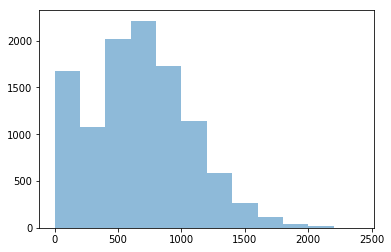

In [53]:
my_bins = range(0,2500,200)
plt.hist(p1, my_bins, alpha = 0.5)
plt.show()

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a game that only lasts 25 turns.

In [54]:
#About 10%
from __future__ import division
bcount = 0
count = 0
for i in range(10000):
    count+= 1
    p1s = 0
    p1c = 200
    for i in range(25):
        p1s, p1c = miniopoly_turn(p1s, p1c)
        if p1c < 0:
            p1c = 0
            bcount+=1
            break
print(bcount)
print(count)
#print(float(bcount/count))
Pb = float(bcount/count)
print('Probability player goes bankrupt for a 25 or less turn game: ', float(bcount/count))

1037
10000
('Probability player goes bankrupt for a 25 or less turn game: ', 0.1037)


This code just calculates how many players go bankrupt in a 25 turn game then divides it by the total number of games, 10000. 

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a 25 turn game  _given_ that they went to **Jail** at least twice.  Is a player more or less likely to go bankrupt if they've been to **Jail** twice?  

A player is actually less likely to go bankrupt if they have gone to jail twice. The code below will iterate 10000 times and find the cases where a player has been on jail for more than 2 turns and then will see if they are bankrupt. If so it adds 1 to the count. 

In [55]:
#Estimate probability of going bankrupt given jail at least twice.
bcount = 0
count = 0
for i in range(10000):
    count+= 1
    jtime = 0
    p1s = 0
    p1c = 200
    for i in range(25):
        p1s, p1c = miniopoly_turn(p1s, p1c)
        if p1s == 30:
            if jtime >=2:
                if p1c <= 0:
                    p1c = 0
                    bcount+=1
                    break
            else:
                jtime += 1
        if p1c < 0:
            p1c = 0
            #bcount+=1
            break
print(count)
final = float(bcount/count)
print('Probability player goes bankrupt after going to jail twice: ', final)

10000
('Probability player goes bankrupt after going to jail twice: ', 0.0536)


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least twice, given that the player went bankrupt in the first 25 turns.

In [56]:
#Estimate probability of going to jail twice, given bankruptcy in first 25 turns.
count = 0
jcount = 0
for i in range(10000):
    count+= 1
    jtime = 0
    p1s = 0
    p1c = 200
    for i in range(25):
        p1s, p1c = miniopoly_turn(p1s, p1c)
        if p1s == 30:
            if jtime >=2:
                jcount+=1
                break
            else:
                jtime += 1
j = jcount/10000
print("Prob of jail twice: ", j)
t = final*j/Pb
print("Prob of Bankrupt given going to jail twice", t)

('Prob of jail twice: ', 0.348)
('Prob of Bankrupt given going to jail twice', 0.17987270973963357)


The code above will first calculate the probability of going bankrupt and then will use previously calculated values to find the anwser. 

***
<a id='p5'></a>
[Back to top](#top)

### [15 points] Problem 5

To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *claim* that has a 10% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *claim* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *claim* is false is 5%

If they *find* an important result they are published.  What is the probability that their *claim* was true, given that they were published?

**Solution**
P(C) = probability correct
P(F) = Important result

$$P(C \mid F) = \frac{P(F \mid C)*P(C)}{P(F)}$$
To find the values I used a tree structure with one branch being .1 and the other being .9 for the claim being correct and not correct. I then used this to calculate the rest of the probabilities. 
$$\frac{.5*.1}{.5*.1+.5*.9} = .52$$ or about $$\frac{10}{19}$$